# EX1

In [16]:
def read_matrix(file):
    ''' this function will read distance matrix and store them in dictionary of dictionaries'''
    final_dict = {}
    pos = 0
    with open(file, 'r') as f:
        k= f.readline().strip().split()# to store objects as keys in variable K
        for l in f: # loop on file to read all lines 
            line = l.strip().split()
            temp_dict = {} # store distance in in individual dictionries
            for p in range(len(k)):
                temp_dict[k[p]] = int(line[p + 1]) 
             #now make a dictionary for all object and store all dictionaries 
            final_dict[k[pos]] = temp_dict
            pos += 1
    return final_dict
              
             
read_matrix('small-distances.txt')       

{'A': {'A': 0, 'B': 4, 'C': 1, 'D': 2, 'E': 5},
 'B': {'A': 4, 'B': 0, 'C': 5, 'D': 2, 'E': 3},
 'C': {'A': 1, 'B': 5, 'C': 0, 'D': 3, 'E': 6},
 'D': {'A': 2, 'B': 2, 'C': 3, 'D': 0, 'E': 3},
 'E': {'A': 5, 'B': 3, 'C': 6, 'D': 3, 'E': 0}}

# EX2

In [82]:
def element_count(clust):
    '''this function will count the number of elementray objects in nested tuple'''
    if isinstance(clust, tuple): # check if cluster type is tuple
        #print(clust[0])# ('D','E')
        if isinstance(clust[0], tuple) and not isinstance(clust[1], tuple):
            # apply function on clust[0] 
            return 1 + element_count(clust[0])
        elif isinstance(clust[1], tuple) and not isinstance(clust[0], tuple):
            #apply func on clust[1] 
            return 1 + element_count(clust[1])
        elif isinstance(clust[1], tuple) and isinstance(clust[0], tuple):
            # apply function on both clust[0] and clust[1] then add them
            return element_count(clust[0]) + element_count(clust[1])
        else:
            return 2
    elif isinstance(clust, str):
        return 1
        
print(element_count(((('A','B'),'C'))))
print(element_count(((('A','B'),'C'),('D','E'))))

3
5


# Ex3

In [103]:

def merging_clust(dist_mat, clust1, clust2):
    '''this function will merge two clusters by updating distance matrix 
    parameters: distance matrices and two clusters'''
    
# Get the number of elements in each cluster using above function element_count
    num_elem_clust1 = element_count(clust1)
    num_elem_clust2 = element_count(clust2)
    # Update distance matrix
    temp_dict = {}
    #loop over keys and values of  distance matrix
    for k,v in dist_mat.items():
        if k not in (clust1, clust2):
            # using following formula merge the cluster and update their distance
            new_dist = ((num_elem_clust1 * dist_mat[k][clust1]) + (num_elem_clust2 * dist_mat[k][clust2])) / (
                num_elem_clust1 + num_elem_clust2)
            dist_mat[k][(clust1, clust2)] = new_dist
            temp_dict[k] = new_dist
    dist_mat[(clust1, clust2)] = temp_dict
    dist_mat[(clust1, clust2)][(clust1, clust2)] = 0.0
    # Clean distance matrix after merging clusters
    del dist_mat[clust1]
    del dist_mat[clust2]
    for k, v in dist_mat.items():
        if k != (clust1, clust2):
            del v[clust1]
            del v[clust2]
    return dist_mat
    


In [104]:
merging_clust(read_matrix('small-distances.txt'),'A','C')

{'B': {'B': 0, 'D': 2, 'E': 3, ('A', 'C'): 4.5},
 'D': {'B': 2, 'D': 0, 'E': 3, ('A', 'C'): 2.5},
 'E': {'B': 3, 'D': 3, 'E': 0, ('A', 'C'): 5.5},
 ('A', 'C'): {'B': 4.5, 'D': 2.5, 'E': 5.5, ('A', 'C'): 0.0}}

# EX 4

In [42]:
def closet_clust(dist_mat):
    ''' this function will take distance matrix as input and return two clusters whose
    distance is smaller'''
    # make tuple of distance matrix keys
    keys = tuple(dist_mat.keys())
    #found distance between key 0 and 1
    dist = dist_mat[keys[0]][keys[1]]
    # merge both keys 
    clust = (keys[0], keys[1])
    # iterate over both keys and values
    for k, v in dist_mat.items():
        for x, y in v.items():
            if k != x and dist_mat[k][x] < dist:
                # update dist with smallest distance
                dist = dist_mat[k][x]
                #merge these closest clusters
                clust = (k, x)
    return clust

                
closet_clust(read_matrix('small-distances.txt'))
    

('A', 'C')

# Ex 5

In [93]:
from showtree import showtree
def hierarchial_clust(dist_mat):
    '''it will give final cluster as a tuple and hight for each cluster
    key is cluster and value is hight'''
    f={k:0 for k in dist_mat.keys()}
    # loop untill length of dis_mat > 1
    while len(dist_mat) > 1:
        #get closest clusters using clost_clust function
        clust1, clust2 = closet_clust(dist_mat)
        f[(clust1,clust2)]=dist_mat[clust1][clust2]
        # merge cluster 1 and cluster 2 using above merging_clust function
        merging_clust(dist_mat, clust1, clust2)
    return dist_mat.popitem()[0],f
 


In [94]:
# for file small distance
dist_mat = read_matrix("small-distances.txt")
node,height=hierarchial_clust(dist_mat)
print(node)

(('A', 'C'), ('E', ('B', 'D')))


{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, ('A', 'C'): 1, ('B', 'D'): 2, ('E', ('B', 'D')): 3.0, (('A', 'C'), ('E', ('B', 'D'))): 4.166666666666667}


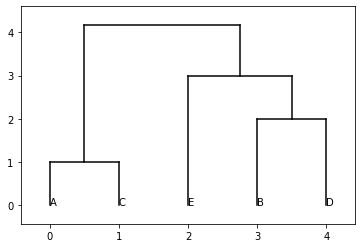

In [95]:
print(height)
showtree(node,height)

In [96]:
# result for file distance.txt
dist_mat = read_matrix("distances.txt")
node,height=hierarchial_clust(dist_mat)
print(node)

('M', (((('A', 'K'), ('B', 'L')), ('J', ('E', 'G'))), (('C', 'H'), ('D', ('F', 'I')))))


{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, ('A', 'K'): 1, ('B', 'L'): 1, ('F', 'I'): 1, ('C', 'H'): 2, ('E', 'G'): 2, (('A', 'K'), ('B', 'L')): 2.0, ('J', ('E', 'G')): 3.0, ('D', ('F', 'I')): 3.5, ((('A', 'K'), ('B', 'L')), ('J', ('E', 'G'))): 4.0, (('C', 'H'), ('D', ('F', 'I'))): 5.0, (((('A', 'K'), ('B', 'L')), ('J', ('E', 'G'))), (('C', 'H'), ('D', ('F', 'I')))): 6.685714285714286, ('M', (((('A', 'K'), ('B', 'L')), ('J', ('E', 'G'))), (('C', 'H'), ('D', ('F', 'I'))))): 10.5}


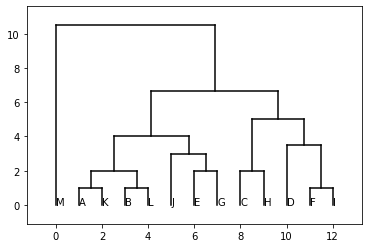

In [97]:
print(height)
showtree(node,height)